## Airplane tourism example

In [1]:
import numpy as np
import simulation.airplane as ap

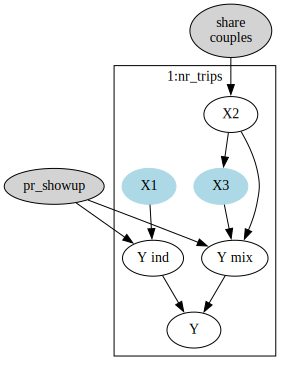

In [2]:
ap.plot_causal_graph()

In [3]:
# experiment parameters setup
p_showup = 0.85
p_couple = 0.6
nr_samples = 2000
true_expectation = p_showup * 3

rng = np.random.default_rng(seed=1317)
y_individuals = rng.binomial(n=3, p=p_showup, size=nr_samples)

print(f"The empirical average nr of individuals who show up is: {y_individuals.mean()}")
print(f"The theoretical average nr of individuals who show up is: {true_expectation}")

The empirical average nr of individuals who show up is: 2.5595
The theoretical average nr of individuals who show up is: 2.55


In [4]:
df = ap.compute_nr_passengers(p_showup, p_couple, nr_samples=nr_samples)
df.head()

,third_wheel,y_individuals,y_mix,nr_show_up
0,1,1,3,3
1,1,3,3,3
2,0,3,2,3
3,1,2,2,2
4,0,3,0,3


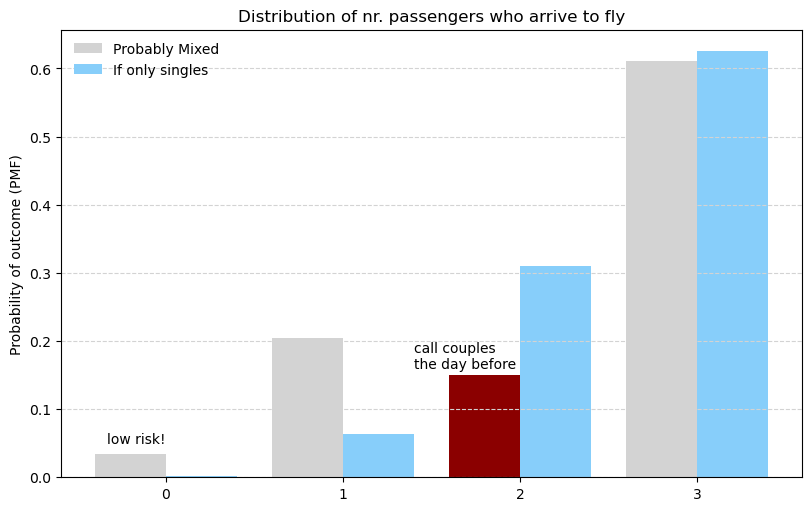

In [5]:
ap.plot_passengers(df, p_showup=p_showup)